In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import seaborn as sns




[[1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
  0.0000]
 [1.0000 0.2690 0.1519 0.1092 0.0843 0.0667 0.0532 0.0426 0.0342 0.0274
  0.0220]
 [1.0000 0.4649 0.2922 0.2142 0.1662 0.1317 0.1051 0.0842 0.0675 0.0542
  0.0435]
 [1.0000 0.6072 0.4151 0.3113 0.2432 0.1932 0.1544 0.1237 0.0992 0.0796
  0.0638]
 [1.0000 0.7103 0.5189 0.3981 0.3135 0.2497 0.1997 0.1601 0.1284 0.1030
  0.0827]
 [1.0000 0.7844 0.6035 0.4728 0.3753 0.2998 0.2401 0.1925 0.1544 0.1239
  0.0994]
 [1.0000 0.8370 0.6700 0.5344 0.4273 0.3423 0.2745 0.2202 0.1767 0.1418
  0.1138]
 [1.0000 0.8733 0.7198 0.5825 0.4686 0.3764 0.3021 0.2425 0.1946 0.1561
  0.1253]
 [1.0000 0.8968 0.7543 0.6168 0.4986 0.4012 0.3223 0.2588 0.2077 0.1667
  0.1337]
 [1.0000 0.9101 0.7745 0.6373 0.5167 0.4164 0.3346 0.2687 0.2157 0.1731
  0.1389]
 [1.0000 0.9144 0.7812 0.6442 0.5228 0.4214 0.3388 0.2720 0.2183 0.1752
  0.1406]
 [1.0000 0.9101 0.7745 0.6373 0.5167 0.4164 0.3346 0.2687 0.2157 0.1731
  0.1389]
 [1.0000 0.8968 

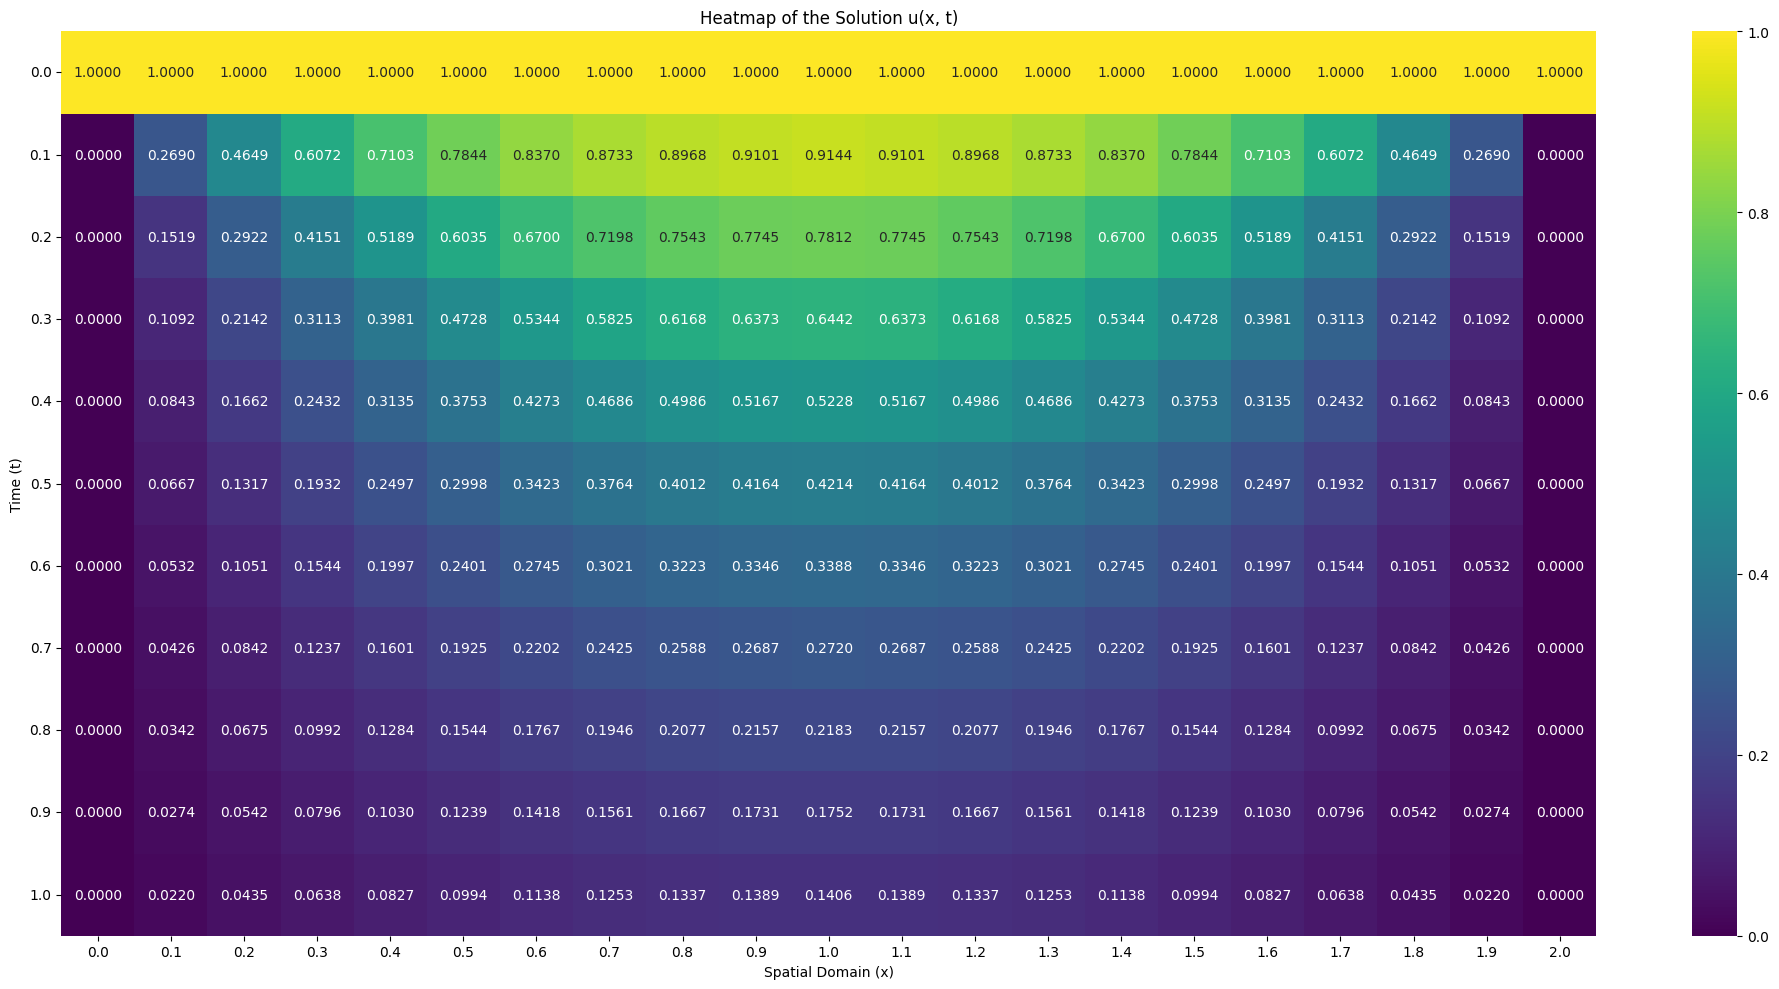

In [ ]:
def backward_euler(u0, L, T, h, tau):
    M = int(L / h)  # Number of spatial steps
    N = int(T / tau)  # Number of time steps
    x = np.linspace(0, L, M+1)
    t = np.linspace(0, T, N+1)

    r = tau / h**2
    A = np.diag((1 + 2 * r)*np.ones(M-1)) - np.diag(r * np.ones(M-2), -1) - np.diag(r *np.ones(M-2), 1)
    #print(A)
    u = np.zeros((M+1, N+1))
    u[:, 0] = u0(x)

    for j in range(N):
        b = u[1:M, j]
        b[0] += r * 0  # Applying left boundary condition
        b[-1] += r * 0  # Applying right boundary condition
        u[1:M, j+1] = scipy.linalg.solve(A, b)

    return x, t, u

# Initial condition and parameters
u0 = lambda x: np.ones_like(x)
L, T = 2, 1  # Domain length and total time
h, tau = 0.1, 0.1  # Spatial and temporal step sizes

x, t, u = backward_euler(u0, L, T, h, tau)

# Convert the matrix to a string with specified formatting and print
print(np.array2string(u, formatter={'float_kind':lambda x: f"{x:.4f}"}))

# Heatmap of the solution with values annotated
# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Plot the heatmap
ax = sns.heatmap(u.T, annot=True, fmt=".4f", cmap='viridis', xticklabels=np.round(x, 2), yticklabels=np.round(t, 2))

# Annotations inside the heatmap for values
# Seaborn automatically annotates the heatmap when annot=True and fmt specifies the format

# Improving the aesthetics
plt.title('Heatmap of the Solution u(x, t)')
plt.xlabel('Spatial Domain (x)')
plt.ylabel('Time (t)')

# Adjust the axis labels to show more meaningful values
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 10)
ax.set_yticklabels(np.round(t, 2), rotation=0, fontsize = 10)

plt.tight_layout()
plt.show()

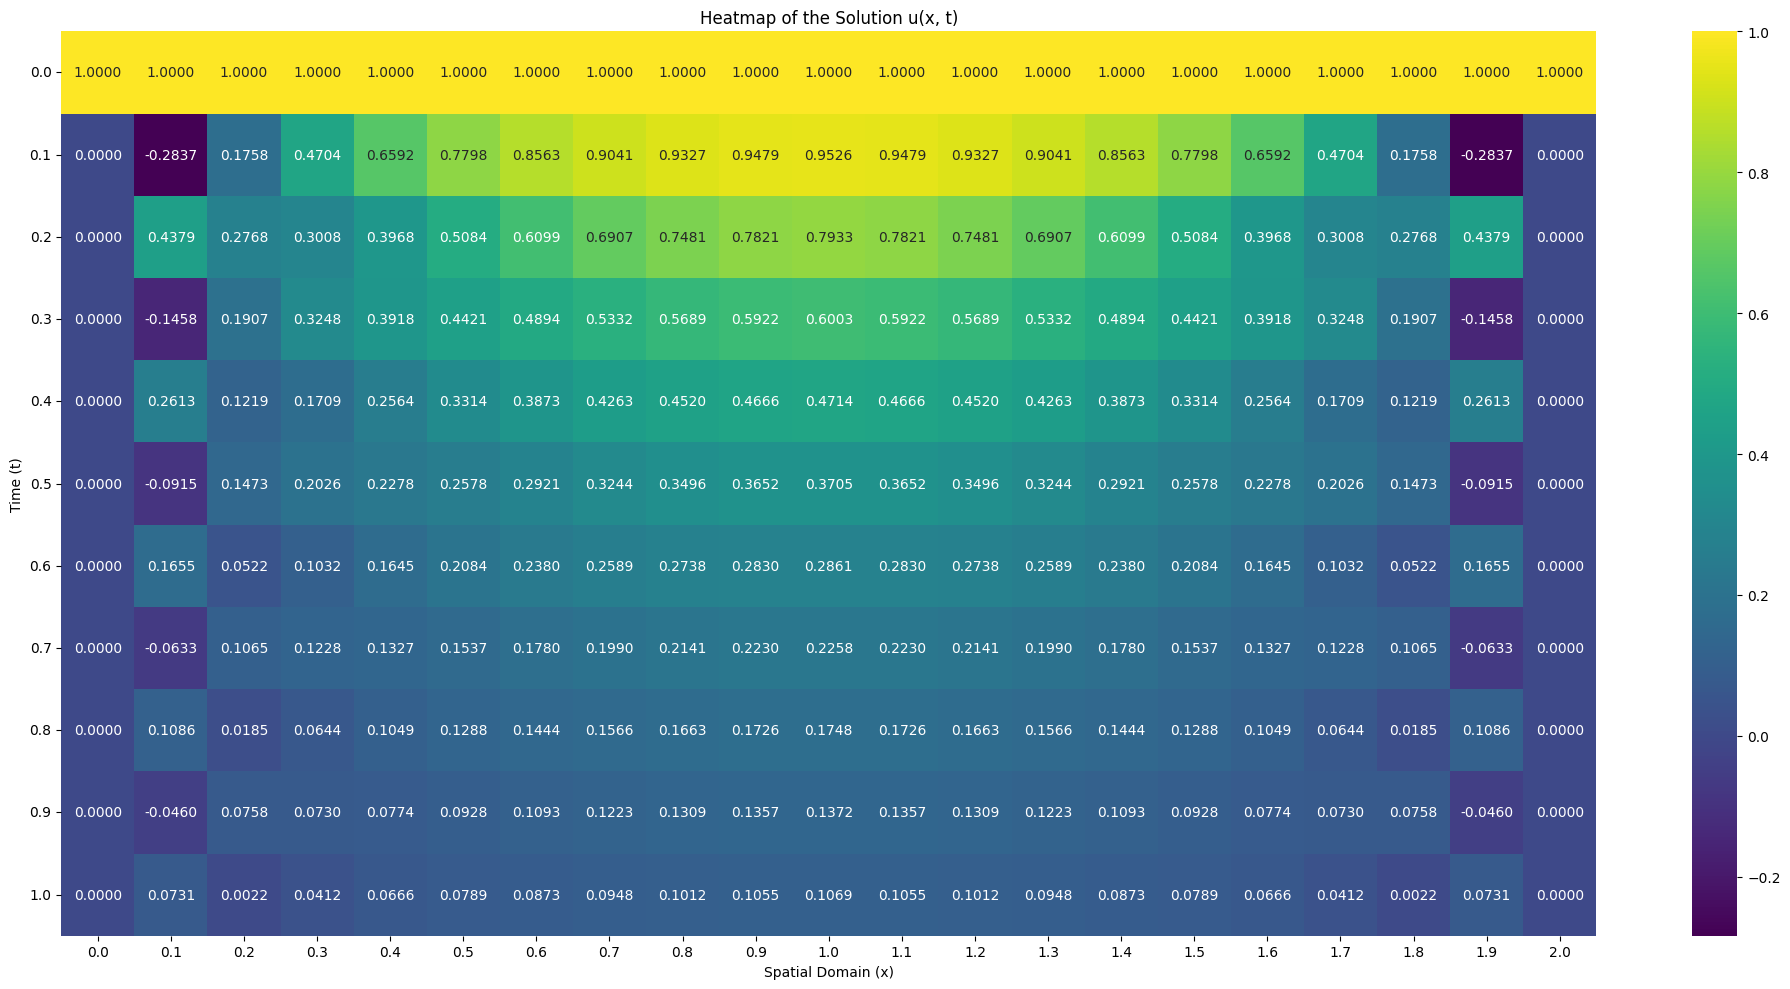

In [ ]:


def crank_nicolson(u0, L, T, h, tau):
    M = int(L / h)  # Number of spatial divisions
    N = int(T / tau)  # Number of time divisions
    x = np.linspace(0, L, M+1)
    t = np.linspace(0, T, N+1)

    r = tau / h**2
    #print(r)
    #coefficients for matrices A and B
    A = np.diag((2 + 2*r) * np.ones(M-1)) + np.diag((-r) * np.ones(M-2), 1) + np.diag((-r) * np.ones(M-2), -1)
    B = np.diag((2 - 2*r) * np.ones(M-1)) + np.diag((r) * np.ones(M-2), 1) + np.diag((r) * np.ones(M-2), -1)
    #print(A)
    u = np.zeros((M+1, N+1))
    u[:, 0] = u0(x)  # Applying the initial condition

    for j in range(N):
        b = np.dot(B, u[1:M, j])
        # Boundary conditions are implicitly zero; adjust if conditions differ
        u[1:M, j+1] = scipy.linalg.solve(A, b)

    return x, t, u

# Example parameters
u0 = lambda x: np.ones_like(x)  # Adjust initial condition as necessary
L = 2.0  # Spatial domain length
T = 1.0  # Total time
h = 0.1  # Spatial step size
tau = 0.1  # Time step size

# Running the solver
x, t, u = crank_nicolson(u0, L, T, h, tau)

# Heatmap of the solution with values annotated
# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Plot the heatmap
ax = sns.heatmap(u.T, annot=True, fmt=".4f", cmap='viridis', xticklabels=np.round(x, 2), yticklabels=np.round(t, 2))

# Annotations inside the heatmap for values
# Seaborn automatically annotates the heatmap when annot=True and fmt specifies the format

# Improving the aesthetics
plt.title('Heatmap of the Solution u(x, t)')
plt.xlabel('Spatial Domain (x)')
plt.ylabel('Time (t)')

# Adjust the axis labels to show more meaningful values
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 10)
ax.set_yticklabels(np.round(t, 2), rotation=0, fontsize = 10)

plt.tight_layout()
plt.show()

In [ ]:
def analytical_solution(x, t, N=1000):
    sum_series = 0
    for n in range(1, N+1):
        sum_series += (1 - (-1)**n) * 2 / (n * np.pi) * np.sin(n * np.pi * x / 2) * np.exp(-n**2 * np.pi**2 * t / 4)
    return sum_series



In [ ]:
def l2_error(u_numerical, u_analytical, h):
    """Compute the L2 error incorporating the spatial step size."""
    return np.sqrt(np.sum((u_numerical - u_analytical)**2) * h)

def linf_error(numerical, analytical):
    """Computes the L-infinity error."""
    return np.max(np.abs(numerical - analytical))


In [ ]:
def linf_error(u_numerical, u_analytical):
    """Compute the L-infinity (max) error."""
    return np.max(np.abs(u_numerical - u_analytical))

# Assuming h, tau, x, t, L, and the functions backward_euler, crank_nicolson, and analytical_solution are defined

# Analytical solution at t = 1
u_analytical = analytical_solution(x, 1, N=100)

# Calculate errors for Backward Euler method
u_backward_euler = backward_euler(u0, L, 1, h, tau)[2][:, -1]  # Get the last time step
error_l2_backward_euler = l2_error(u_backward_euler, u_analytical, h)
error_linf_backward_euler = linf_error(u_backward_euler, u_analytical)

# Calculate errors for Crank-Nicolson method
u_crank_nicolson = crank_nicolson(u0, L, 1, h, tau)[2][:, -1]  # Get the last time step
error_l2_crank_nicolson = l2_error(u_crank_nicolson, u_analytical, h)
error_linf_crank_nicolson = linf_error(u_crank_nicolson, u_analytical)

# Output errors
print(f"Backward Euler L2 Error: {error_l2_backward_euler:.4f}, Linf Error: {error_linf_backward_euler:.4f}")
print(f"Crank-Nicolson L2 Error: {error_l2_crank_nicolson:.4f}, Linf Error: {error_linf_crank_nicolson:.4f}")



Backward Euler L2 Error: 0.0326, Linf Error: 0.0326
Crank-Nicolson L2 Error: 0.0290, Linf Error: 0.0562


In [ ]:
import pandas as pd

# Lists of tau and h values to iterate over
tau_values = [0.1, 0.01]
h_values = [0.1, 0.05, 0.025]

# Initialize a DataFrame to store the results
results_df_cn = pd.DataFrame(columns=['Method', 'h', 'tau', 'L2 Error', 'Linf Error'])

u0 = lambda x: np.ones_like(x)  # Example initial condition
L = 2  # Length of the domain
T = 1  # Total time

# Loop over combinations of h and tau
for tau in tau_values:
    for h in h_values:
        x, t, u_crank_nicolson = crank_nicolson(u0, L, T, h, tau)
        u_analytical = analytical_solution(x, T, N=100)

        # Calculate errors
        error_l2 = l2_error(u_crank_nicolson[:, -1], u_analytical, h)
        error_linf = linf_error(u_crank_nicolson[:, -1], u_analytical)

        # Append the results
        results_df_cn = results_df_cn.append({'Method': 'Crank-Nicolson','h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf}, ignore_index=True)

# Display the results
print(results_df_cn)

           Method      h   tau  L2 Error  Linf Error
0  Crank-Nicolson  0.100  0.10  0.029024    0.056198
1  Crank-Nicolson  0.050  0.10  0.091210    0.279439
2  Crank-Nicolson  0.025  0.10  0.140592    0.548905
3  Crank-Nicolson  0.100  0.01  0.000312    0.000312
4  Crank-Nicolson  0.050  0.01  0.000068    0.000068
5  Crank-Nicolson  0.025  0.01  0.000024    0.000067


<ipython-input-7-028d26d6a495>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_cn = results_df_cn.append({'Method': 'Crank-Nicolson','h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf}, ignore_index=True)
<ipython-input-7-028d26d6a495>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_cn = results_df_cn.append({'Method': 'Crank-Nicolson','h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf}, ignore_index=True)
<ipython-input-7-028d26d6a495>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_cn = results_df_cn.append({'Method': 'Crank-Nicolson','h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf}, ignore_index=True)
<ipython-input-7-028d26d6a495>:

In [ ]:
# Lists of tau and h values to iterate over
tau_values = [0.1, 0.01]
h_values = [0.1, 0.05, 0.025]

# Initialize a DataFrame to store the results
results_df_backward = pd.DataFrame(columns=['Method', 'h', 'tau', 'L2 Error', 'Linf Error'])

u0 = lambda x: np.ones_like(x)  # Example initial condition
L, T = 2, 1  # Domain length and total time

# Loop over combinations of h and tau
for tau in tau_values:
    for h in h_values:
        x, t, u_backward_euler = backward_euler(u0, L, T, h, tau)
        u_analytical = analytical_solution(x, T, N=100)

        # Calculate errors
        error_l2 = l2_error(u_backward_euler[:, -1], u_analytical, h)
        error_linf = linf_error(u_backward_euler[:, -1], u_analytical)

        # Append the results
        results_df_backward = results_df_backward.append({
            'Method': 'Backward Euler',
            'h': h, 'tau': tau,
            'L2 Error': error_l2, 'Linf Error': error_linf
        }, ignore_index=True)

# Display the results
print(results_df_backward)

<ipython-input-8-40168f8e3125>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_backward = results_df_backward.append({
<ipython-input-8-40168f8e3125>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_backward = results_df_backward.append({
<ipython-input-8-40168f8e3125>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_backward = results_df_backward.append({
<ipython-input-8-40168f8e3125>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_backward = results_df_backward.append({
<ipython-input-8-40168f8e3125>:22: FutureWarning: The frame.append method is deprecated and will be removed from pan

           Method      h   tau  L2 Error  Linf Error
0  Backward Euler  0.100  0.10  0.032635    0.032631
1  Backward Euler  0.050  0.10  0.032424    0.032420
2  Backward Euler  0.025  0.10  0.032371    0.032367
3  Backward Euler  0.100  0.01  0.003604    0.003604
4  Backward Euler  0.050  0.01  0.003363    0.003363
5  Backward Euler  0.025  0.01  0.003303    0.003303


In [ ]:
import pandas as pd
# dataset for plotting
# Lists of tau and h values to iterate over
tau_values = [0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01]
h_values = [0.1]

# Initialize a DataFrame to store the results
results_df_cn_plot = pd.DataFrame(columns=['Method', 'h', 'tau', 'L2 Error', 'Linf Error'])

u0 = lambda x: np.ones_like(x)  # Example initial condition
L = 2  # Length of the domain
T = 1  # Total time

# Loop over combinations of h and tau
for tau in tau_values:
    for h in h_values:
        x, t, u_crank_nicolson = crank_nicolson(u0, L, T, h, tau)
        u_analytical = analytical_solution(x, T, N=1000)

        # Calculate errors
        error_l2 = l2_error(u_crank_nicolson[:, -1], u_analytical, h)
        error_linf = linf_error(u_crank_nicolson[:, -1], u_analytical)

        # Append the results
        results_df_cn_plot = results_df_cn_plot.append({'Method': 'Crank-Nicolson','h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf}, ignore_index=True)

# Initialize a DataFrame to store the results
results_df_backward_plot = pd.DataFrame(columns=['Method', 'h', 'tau', 'L2 Error', 'Linf Error'])

u0 = lambda x: np.ones_like(x)  # Example initial condition
L, T = 2, 1  # Domain length and total time

# Loop over combinations of h and tau
for tau in tau_values:
    for h in h_values:
        x, t, u_backward_euler = backward_euler(u0, L, T, h, tau)
        u_analytical = analytical_solution(x, T, N=1000)

        # Calculate errors
        error_l2 = l2_error(u_backward_euler[:, -1], u_analytical, h)
        error_linf = linf_error(u_backward_euler[:, -1], u_analytical)

        # Append the results
        results_df_backward_plot = results_df_backward_plot.append({
            'Method': 'Backward Euler',
            'h': h, 'tau': tau,
            'L2 Error': error_l2, 'Linf Error': error_linf
        }, ignore_index=True)

# Display the results
print(results_df_backward_plot)

# Display the results
print(results_df_cn_plot)

<ipython-input-9-aa0c93e24e4a>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_cn_plot = results_df_cn_plot.append({'Method': 'Crank-Nicolson','h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf}, ignore_index=True)
<ipython-input-9-aa0c93e24e4a>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_cn_plot = results_df_cn_plot.append({'Method': 'Crank-Nicolson','h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf}, ignore_index=True)
<ipython-input-9-aa0c93e24e4a>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_cn_plot = results_df_cn_plot.append({'Method': 'Crank-Nicolson','h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf}, ignore_index=True)
<

           Method    h   tau  L2 Error  Linf Error
0  Backward Euler  0.1  0.10  0.032635    0.032631
1  Backward Euler  0.1  0.09  0.032549    0.032547
2  Backward Euler  0.1  0.08  0.038897    0.038895
3  Backward Euler  0.1  0.07  0.029157    0.029156
4  Backward Euler  0.1  0.06  0.032149    0.032149
5  Backward Euler  0.1  0.05  0.016623    0.016623
6  Backward Euler  0.1  0.04  0.013384    0.013384
7  Backward Euler  0.1  0.03  0.012974    0.012974
8  Backward Euler  0.1  0.02  0.006874    0.006874
9  Backward Euler  0.1  0.01  0.003604    0.003604
           Method    h   tau  L2 Error  Linf Error
0  Crank-Nicolson  0.1  0.10  0.029024    0.056198
1  Crank-Nicolson  0.1  0.09  0.020673    0.038130
2  Crank-Nicolson  0.1  0.08  0.017361    0.026093
3  Crank-Nicolson  0.1  0.07  0.008612    0.012177
4  Crank-Nicolson  0.1  0.06  0.011406    0.011008
5  Crank-Nicolson  0.1  0.05  0.000585    0.000916
6  Crank-Nicolson  0.1  0.04  0.000118    0.000110
7  Crank-Nicolson  0.1  0.03  0

<ipython-input-9-aa0c93e24e4a>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_backward_plot = results_df_backward_plot.append({
<ipython-input-9-aa0c93e24e4a>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_backward_plot = results_df_backward_plot.append({


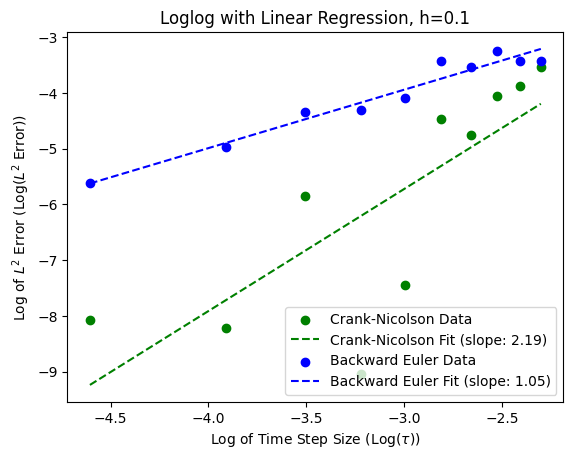

In [ ]:

# Combine the results from both methods into a single DataFrame
results_df = pd.concat([results_df_cn_plot, results_df_backward_plot])

# Ensure that 'tau' and 'L2 Error' are of numeric type
results_df['tau'] = pd.to_numeric(results_df['tau'])
results_df['L2 Error'] = pd.to_numeric(results_df['L2 Error'])

# Preparing the plot
fig, ax = plt.subplots()

colors = {'Backward Euler': 'blue', 'Crank-Nicolson': 'green'}

# Loop over each method to fit and plot
for method in results_df['Method'].unique():
    subset = results_df[results_df['Method'] == method]

    # Log-transforming x (tau) and y (L2 Error) for the regression
    x_log = np.log(subset['tau'])
    y_log = np.log(subset['L2 Error'])

    # Performing the linear least squares regression on the log-transformed values
    A = np.vstack([x_log, np.ones(len(x_log))]).T
    m, c = np.linalg.lstsq(A, y_log, rcond=None)[0]

    # Plotting original data points using their log values
    ax.scatter(x_log, y_log, color=colors[method], label=f'{method} Data')

    # Plotting the regression line using the log-transformed values
    x_vals = np.linspace(min(x_log), max(x_log), 100)  # Generating x values for the line
    y_vals = m * x_vals + c  # Calculating y values for the line
    ax.plot(x_vals, y_vals, color=colors[method], linestyle='--', label=f'{method} Fit (slope: {m:.2f})')

ax.set_xlabel('Log of Time Step Size (Log($\\tau$))')
ax.set_ylabel('Log of $L^2$ Error (Log($L^2$ Error))')
ax.set_title('Loglog with Linear Regression, h=0.1')
ax.legend()

plt.show()


In [ ]:
import pandas as pd
# dataset for plotting
# Lists of tau and h values to iterate over
tau_values = [0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01]
h_values = [0.01]

# Initialize a DataFrame to store the results
results_df_cn_plot1 = pd.DataFrame(columns=['Method', 'h', 'tau', 'L2 Error', 'Linf Error'])

u0 = lambda x: np.ones_like(x)  # Example initial condition
L = 2  # Length of the domain
T = 1  # Total time

# Loop over combinations of h and tau
for tau in tau_values:
    for h in h_values:
        x, t, u_crank_nicolson = crank_nicolson(u0, L, T, h, tau)
        u_analytical = analytical_solution(x, T, N=1000)

        # Calculate errors
        error_l2 = l2_error(u_crank_nicolson[:, -1], u_analytical, h)
        error_linf = linf_error(u_crank_nicolson[:, -1], u_analytical)

        # Append the results
        results_df_cn_plot1 = results_df_cn_plot1.append({'Method': 'Crank-Nicolson','h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf}, ignore_index=True)

# Initialize a DataFrame to store the results
results_df_backward_plot1 = pd.DataFrame(columns=['Method', 'h', 'tau', 'L2 Error', 'Linf Error'])

u0 = lambda x: np.ones_like(x)  # Example initial condition
L, T = 2, 1  # Domain length and total time

# Loop over combinations of h and tau
for tau in tau_values:
    for h in h_values:
        x, t, u_backward_euler = backward_euler(u0, L, T, h, tau)
        u_analytical = analytical_solution(x, T, N=1000)

        # Calculate errors
        error_l2 = l2_error(u_backward_euler[:, -1], u_analytical, h)
        error_linf = linf_error(u_backward_euler[:, -1], u_analytical)

        # Append the results
        results_df_backward_plot1 = results_df_backward_plot1.append({
            'Method': 'Backward Euler',
            'h': h, 'tau': tau,
            'L2 Error': error_l2, 'Linf Error': error_linf
        }, ignore_index=True)

# Display the results
print(results_df_backward_plot1)

# Display the results
print(results_df_cn_plot1)

<ipython-input-11-311b5a0d6ae2>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_cn_plot1 = results_df_cn_plot1.append({'Method': 'Crank-Nicolson','h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf}, ignore_index=True)
<ipython-input-11-311b5a0d6ae2>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_cn_plot1 = results_df_cn_plot1.append({'Method': 'Crank-Nicolson','h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf}, ignore_index=True)
<ipython-input-11-311b5a0d6ae2>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_cn_plot1 = results_df_cn_plot1.append({'Method': 'Crank-Nicolson','h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf}, ignore_inde

           Method     h   tau  L2 Error  Linf Error
0  Backward Euler  0.01  0.10  0.032356    0.032352
1  Backward Euler  0.01  0.09  0.032265    0.032262
2  Backward Euler  0.01  0.08  0.038605    0.038603
3  Backward Euler  0.01  0.07  0.028862    0.028861
4  Backward Euler  0.01  0.06  0.031847    0.031847
5  Backward Euler  0.01  0.05  0.016321    0.016321
6  Backward Euler  0.01  0.04  0.013078    0.013078
7  Backward Euler  0.01  0.03  0.012662    0.012662
8  Backward Euler  0.01  0.02  0.006560    0.006560
9  Backward Euler  0.01  0.01  0.003286    0.003286
           Method     h   tau  L2 Error  Linf Error
0  Crank-Nicolson  0.01  0.10  0.175145    0.793481
1  Crank-Nicolson  0.01  0.09  0.164180    0.773847
2  Crank-Nicolson  0.01  0.08  0.153762    0.752327
3  Crank-Nicolson  0.01  0.07  0.139096    0.718747
4  Crank-Nicolson  0.01  0.06  0.125826    0.681663
5  Crank-Nicolson  0.01  0.05  0.107332    0.622614
6  Crank-Nicolson  0.01  0.04  0.088943    0.549105
7  Crank-Nic

<ipython-input-11-311b5a0d6ae2>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_backward_plot1 = results_df_backward_plot1.append({


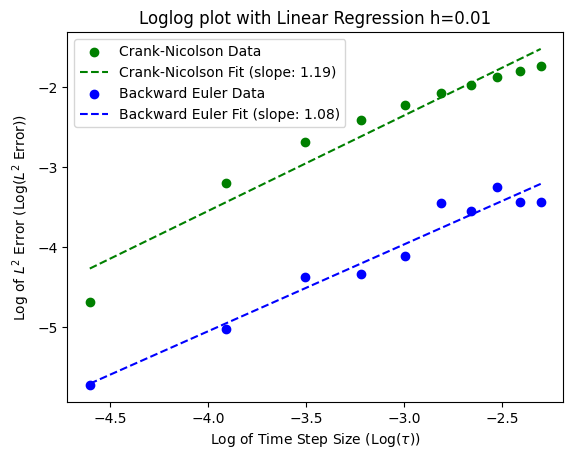

In [ ]:
# Combine the results from both methods into a single DataFrame
results_df1 = pd.concat([results_df_cn_plot1, results_df_backward_plot1])

# Ensure that 'tau' and 'L2 Error' are of numeric type
results_df1['tau'] = pd.to_numeric(results_df1['tau'])
results_df1['L2 Error'] = pd.to_numeric(results_df1['L2 Error'])

# Preparing the plot
fig, ax = plt.subplots()

colors = {'Backward Euler': 'blue', 'Crank-Nicolson': 'green'}

# Loop over each method to fit and plot
for method in results_df1['Method'].unique():
    subset = results_df1[results_df['Method'] == method]

    # Log-transforming x (tau) and y (L2 Error) for the regression
    x_log = np.log(subset['tau'])
    y_log = np.log(subset['L2 Error'])

    # Performing the linear least squares regression on the log-transformed values
    A = np.vstack([x_log, np.ones(len(x_log))]).T
    m, c = np.linalg.lstsq(A, y_log, rcond=None)[0]

    # Plotting original data points using their log values
    ax.scatter(x_log, y_log, color=colors[method], label=f'{method} Data')

    # Plotting the regression line using the log-transformed values
    x_vals = np.linspace(min(x_log), max(x_log), 100)  # Generating x values for the line
    y_vals = m * x_vals + c  # Calculating y values for the line
    ax.plot(x_vals, y_vals, color=colors[method], linestyle='--', label=f'{method} Fit (slope: {m:.2f})')

ax.set_xlabel('Log of Time Step Size (Log($\\tau$))')
ax.set_ylabel('Log of $L^2$ Error (Log($L^2$ Error))')
ax.set_title('Loglog plot with Linear Regression h=0.01')
ax.legend()

plt.show()


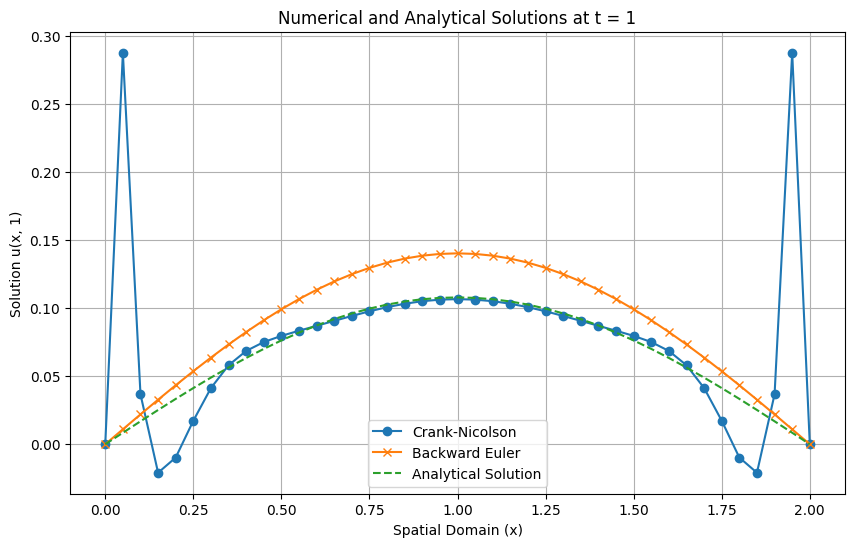

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Specific values for plotting
h = 0.05
tau = 0.1
T = 1  # Total time
L = 2  # Length of the domain

# Generate spatial domain
x = np.linspace(0, L, int(L / h) + 1)

# Calculate numerical solutions
_, _, u_crank_nicolson = crank_nicolson(u0, L, T, h, tau)
_, _, u_backward_euler = backward_euler(u0, L, T, h, tau)

# Calculate analytical solution
u_analytical = analytical_solution(x, T, N=100)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, u_crank_nicolson[:, -1], label='Crank-Nicolson', marker='o')
plt.plot(x, u_backward_euler[:, -1], label='Backward Euler', marker='x')
plt.plot(x, u_analytical, label='Analytical Solution', linestyle='--')

plt.title('Numerical and Analytical Solutions at t = 1')
plt.xlabel('Spatial Domain (x)')
plt.ylabel('Solution u(x, 1)')
plt.legend()
plt.grid(True)
plt.show()


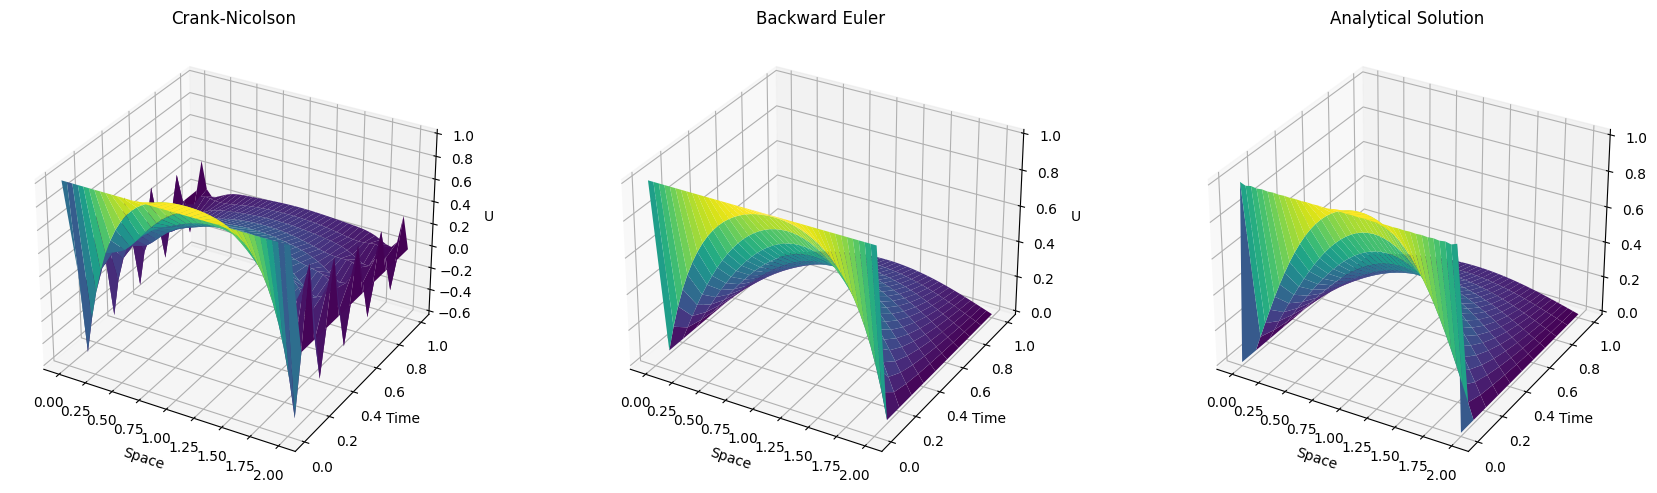

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
L = 2
T = 1
h = 0.05
tau = 0.1
x = np.linspace(0, L, int(L / h) + 1)
t = np.linspace(0, T, int(T / tau) + 1)

# Assuming the crank_nicolson, backward_euler, and analytical_solution functions are defined

# Compute solutions
_, _, u_crank_nicolson = crank_nicolson(u0, L, T, h, tau)
_, _, u_backward_euler = backward_euler(u0, L, T, h, tau)
u_analytical = np.zeros_like(u_crank_nicolson)
for i, ti in enumerate(t):
    u_analytical[:, i] = analytical_solution(x, ti, N=1000)

# Surface plots
X, T = np.meshgrid(x, t)

fig = plt.figure(figsize=(18, 5))

# Crank-Nicolson
ax = fig.add_subplot(131, projection='3d')
ax.plot_surface(X, T, u_crank_nicolson.T, cmap='viridis')
ax.set_title('Crank-Nicolson')
ax.set_xlabel('Space')
ax.set_ylabel('Time')
ax.set_zlabel('U')

# Backward Euler
ax = fig.add_subplot(132, projection='3d')
ax.plot_surface(X, T, u_backward_euler.T, cmap='viridis')
ax.set_title('Backward Euler')
ax.set_xlabel('Space')
ax.set_ylabel('Time')
ax.set_zlabel('U')

#print(u_analytical.T)
# Analytical Solution
ax = fig.add_subplot(133, projection='3d')
ax.plot_surface(X, T, u_analytical.T, cmap='viridis')
ax.set_title('Analytical Solution')
ax.set_xlabel('Space')
ax.set_ylabel('Time')
ax.set_zlabel('U')

plt.tight_layout()
plt.show()


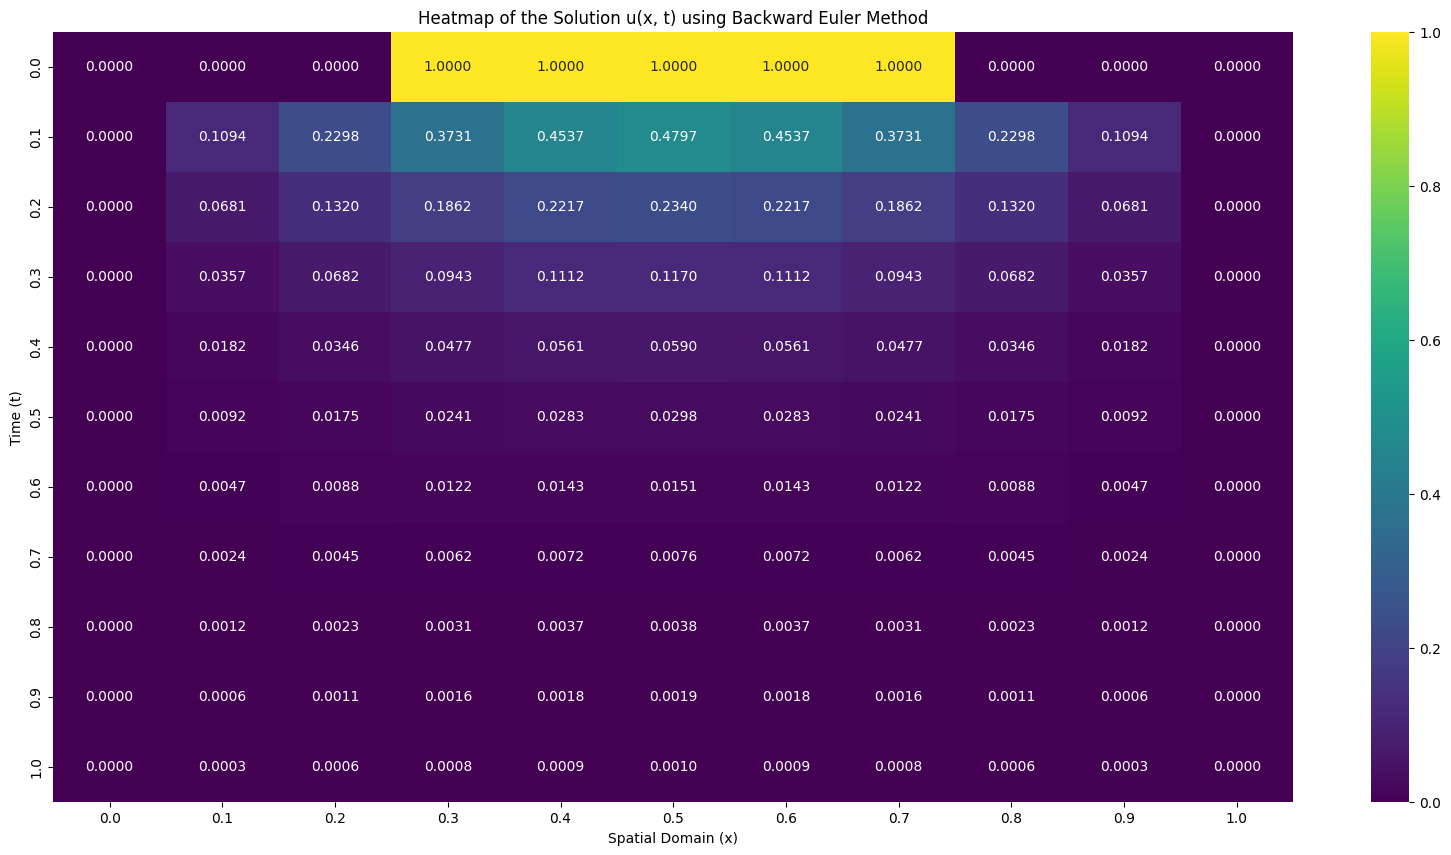

In [ ]:
#Q2
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
import seaborn as sns

def u0(x):
    return np.where((x >= 0.25) & (x <= 0.75), 1, 0)

def backward_euler_q2(u0, L, T, h, tau, kappa):
    M = int(L / h)  # Number of spatial steps
    N = int(T / tau)  # Number of time steps
    x = np.linspace(0, L, M+1)
    t = np.linspace(0, T, N+1)

    r = kappa * tau / h**2
    A = np.diag((1 + 2 * r) * np.ones(M-1)) - np.diag(r * np.ones(M-2), -1) - np.diag(r * np.ones(M-2), 1)
    u = np.zeros((M+1, N+1))
    u[:, 0] = u0(x)  # Applying the step function initial condition

    for j in range(N):
        b = u[1:M, j].copy()  # Copy the interior points to ensure boundary conditions are maintained
        u[1:M, j+1] = scipy.linalg.solve(A, b)  # No additional BCs added because they're homogeneous and already accounted for

    return x, t, u

# Step function initial condition
def step_function_initial_condition(x):
    return np.where((x >= 0.25) & (x <= 0.75), 1, 0)

# Parameters for question 2
L, T = 1, 1  # Domain length and total time
h, tau = 0.1, 0.1  # Spatial and temporal step sizes
kappa = 1  # Diffusion coefficient, adjust as needed for different parts of the question

# Running the backward Euler solver with the step function initial condition
x, t, u = backward_euler_q2(step_function_initial_condition, L, T, h, tau, kappa)

# Visualization with a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(u.T, annot=True, fmt=".4f", cmap='viridis', xticklabels=np.round(x, 2), yticklabels=np.round(t, 2))
plt.title('Heatmap of the Solution u(x, t) using Backward Euler Method')
plt.xlabel('Spatial Domain (x)')
plt.ylabel('Time (t)')
plt.show()



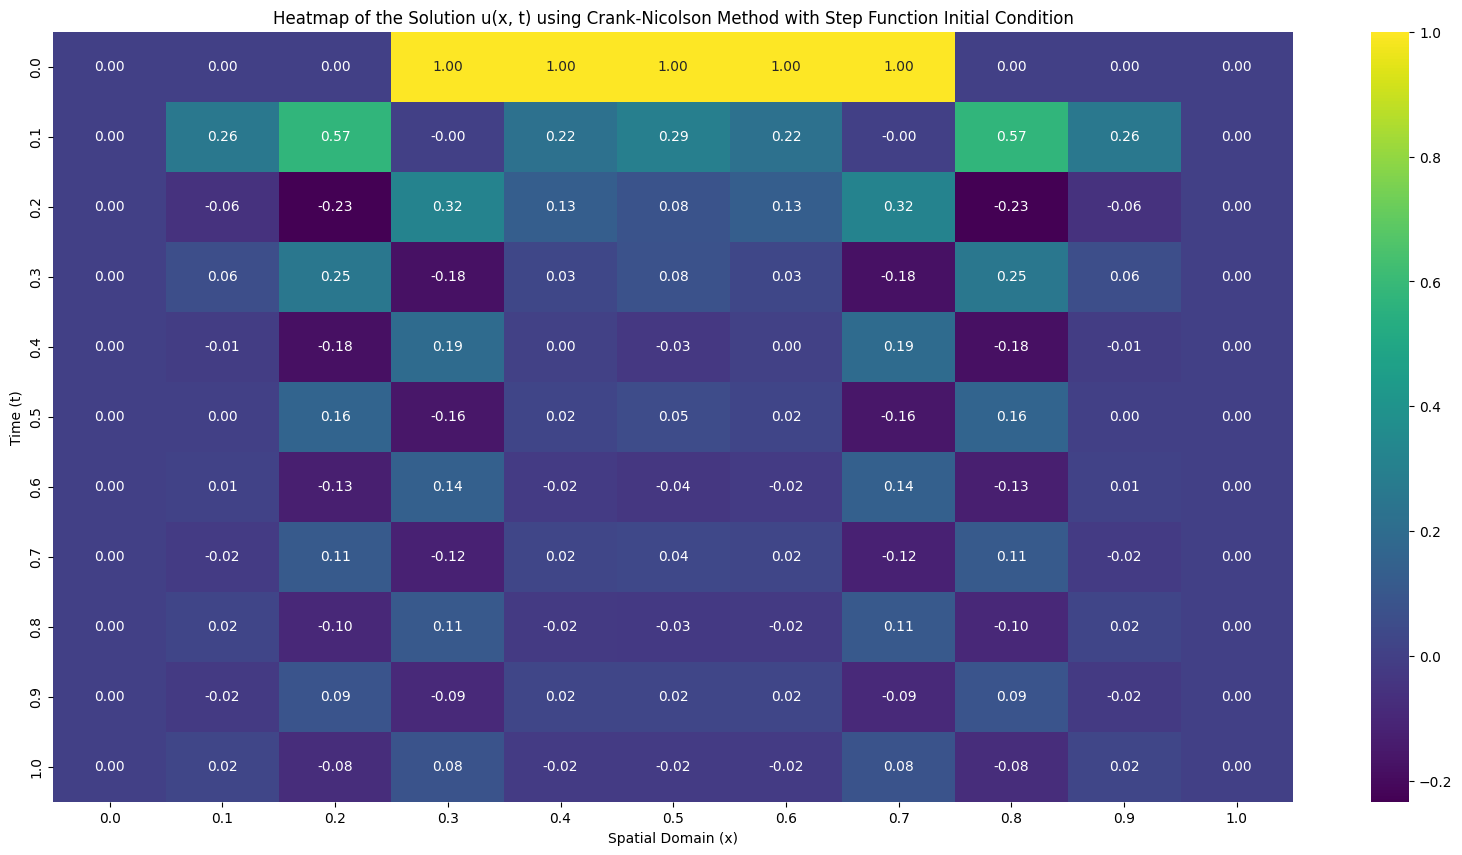

In [ ]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
import seaborn as sns

def u0(x):
    return np.where((x >= 0.25) & (x <= 0.75), 1, 0)

def crank_nicolson_q2(u0, L, T, h, tau, kappa):
    M = int(L / h)  # Number of spatial divisions
    N = int(T / tau)  # Number of time divisions
    x = np.linspace(0, L, M+1)
    t = np.linspace(0, T, N+1)

    r = kappa * tau / h**2
    # Adjusted coefficients for matrices A and B to include kappa
    A = np.diag((2 + 2*r) * np.ones(M-1)) + np.diag((-r) * np.ones(M-2), 1) + np.diag((-r) * np.ones(M-2), -1)
    B = np.diag((2 - 2*r) * np.ones(M-1)) + np.diag((r) * np.ones(M-2), 1) + np.diag((r) * np.ones(M-2), -1)




    u = np.zeros((M+1, N+1))
    u[:, 0] = u0(x)  # Applying the step function initial condition

    for j in range(N):
        # Preparing vector for the next time step
        b = np.dot(B, u[1:M, j])
        # Boundary conditions are implicitly zero; adjust if your conditions differ
        u[1:M, j+1] = scipy.linalg.solve(A, b)

    return x, t, u

# Step function initial condition
def step_function_initial_condition(x):
    return np.where((x >= 0.25) & (x <= 0.75), 1, 0)

# Parameters for question 2
L, T = 1, 1  # Domain length and total time
h, tau = 0.1, 0.1  # Spatial and temporal step sizes, as per your request for τ = 0.1 and h = 0.05
kappa = 1  # Diffusion coefficient, adjust as needed for different parts of the question

# Running the Crank-Nicolson solver with the step function initial condition
x, t, u = crank_nicolson_q2(step_function_initial_condition, L, T, h, tau, kappa)

# Visualization with Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(u.T, annot=True, fmt=".2f", cmap='viridis', xticklabels=np.round(x, 2), yticklabels=np.round(t, 2))
plt.title('Heatmap of the Solution u(x, t) using Crank-Nicolson Method with Step Function Initial Condition')
plt.xlabel('Spatial Domain (x)')
plt.ylabel('Time (t)')
plt.show()


In [ ]:

def analytical_solution_q2(x, t, kappa, N=100):
    """Analytical solution for the heat equation with step function initial condition."""
    u = 0
    for n in range(1, N+1):
          u += 4 / (n * np.pi) * np.sin(n * np.pi / 2) * np.sin(n * np.pi / 4) * np.sin(n * np.pi * x) * np.exp(-kappa * n**2 * np.pi**2 * t)
    return u


In [ ]:
def l2_error(u_numerical, u_analytical, h):
    """Compute the L2 error incorporating the spatial step size."""
    return np.sqrt(np.sum((u_numerical - u_analytical)**2) * h)

def linf_error(numerical, analytical):
    """Computes the L-infinity error."""
    return np.max(np.abs(numerical - analytical))

In [ ]:
import pandas as pd

def u0(x):
    return np.where((x >= 0.25) & (x <= 0.75), 1, 0)

# Lists of tau and h values to iterate over
tau_values = [0.1, 0.01]
h_values = [0.1, 0.05, 0.025]
kappa_values = [1, 5, 10]
# Initialize a DataFrame to store the results
results_df_cn_q2 = pd.DataFrame(columns=['Method', 'h', 'tau', 'L2 Error', 'Linf Error', 'kappa'])

u0 = lambda x: np.ones_like(x)  # Example initial condition
L = 1  # Length of the domain
T = 1  # Total time

# Loop over combinations of h and tau
for tau in tau_values:
    for h in h_values:
      for kappa in kappa_values:
        x, t, u_crank_nicolson = crank_nicolson_q2(u0, L, T, h, tau, kappa)
        u_analytical = analytical_solution_q2(x, T, kappa, N=100)

        # Calculate errors
        error_l2 = l2_error(u_crank_nicolson[:, -1], u_analytical, h)
        error_linf = linf_error(u_crank_nicolson[:, -1], u_analytical)

        # Append the results
        results_df_cn_q2 = results_df_cn_q2.append({'Method': 'Crank-Nicolson','h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf, 'kappa': kappa}, ignore_index=True)

# Display the results
print(results_df_cn_q2)

<ipython-input-19-fc08dd3bdffa>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_cn_q2 = results_df_cn_q2.append({'Method': 'Crank-Nicolson','h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf, 'kappa': kappa}, ignore_index=True)
<ipython-input-19-fc08dd3bdffa>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_cn_q2 = results_df_cn_q2.append({'Method': 'Crank-Nicolson','h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf, 'kappa': kappa}, ignore_index=True)
<ipython-input-19-fc08dd3bdffa>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_cn_q2 = results_df_cn_q2.append({'Method': 'Crank-Nicolson','h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf

            Method      h   tau      L2 Error    Linf Error kappa
0   Crank-Nicolson  0.100  0.10  2.909388e-02  5.599260e-02     1
1   Crank-Nicolson  0.100  0.10  1.533010e-01  3.264242e-01     5
2   Crank-Nicolson  0.100  0.10  2.173436e-01  4.469143e-01    10
3   Crank-Nicolson  0.050  0.10  9.125978e-02  2.793079e-01     1
4   Crank-Nicolson  0.050  0.10  2.212308e-01  5.881203e-01     5
5   Crank-Nicolson  0.050  0.10  2.810043e-01  6.821359e-01    10
6   Crank-Nicolson  0.025  0.10  1.406310e-01  5.488350e-01     1
7   Crank-Nicolson  0.025  0.10  2.596708e-01  7.722325e-01     5
8   Crank-Nicolson  0.025  0.10  3.150462e-01  8.296637e-01    10
9   Crank-Nicolson  0.100  0.01  1.675709e-05  2.369810e-05     1
10  Crank-Nicolson  0.100  0.01  2.601531e-11  3.575636e-11     5
11  Crank-Nicolson  0.100  0.01  8.200773e-07  1.001677e-06    10
12  Crank-Nicolson  0.050  0.01  1.411870e-05  1.996686e-05     1
13  Crank-Nicolson  0.050  0.01  1.331480e-04  2.873180e-04     5
14  Crank-

<ipython-input-19-fc08dd3bdffa>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_cn_q2 = results_df_cn_q2.append({'Method': 'Crank-Nicolson','h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf, 'kappa': kappa}, ignore_index=True)


In [ ]:
def u0(x):
    return np.where((x >= 0.25) & (x <= 0.75), 1, 0)

# Lists of tau and h values to iterate over
tau_values = [0.1, 0.01]
h_values = [0.1, 0.05, 0.025]
kappa_values = [1, 5, 10]

# Initialize a DataFrame to store the results
results_df_backward_q2 = pd.DataFrame(columns=['Method', 'h', 'tau', 'L2 Error', 'Linf Error', 'kappa'])

u0 = lambda x: np.ones_like(x)  # Example initial condition
L, T = 1, 1  # Domain length and total time

# Loop over combinations of h and tau
for tau in tau_values:
    for h in h_values:
      for kappa in kappa_values:
        x, t, u_backward_euler = backward_euler_q2(u0, L, T, h, tau, kappa)
        u_analytical = analytical_solution_q2(x, T, kappa, N=100)

        # Calculate errors
        error_l2 = l2_error(u_backward_euler[:, -1], u_analytical, h)
        error_linf = linf_error(u_backward_euler[:, -1], u_analytical)

        # Append the results
        results_df_backward_q2 = results_df_backward_q2.append({'Method': 'Backward Euler', 'h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf, 'kappa': kappa}, ignore_index=True)

# Display the results
print(results_df_backward_q2)

<ipython-input-20-df08a8a4d7ed>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_backward_q2 = results_df_backward_q2.append({'Method': 'Backward Euler', 'h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf, 'kappa': kappa}, ignore_index=True)
<ipython-input-20-df08a8a4d7ed>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_backward_q2 = results_df_backward_q2.append({'Method': 'Backward Euler', 'h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf, 'kappa': kappa}, ignore_index=True)
<ipython-input-20-df08a8a4d7ed>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_backward_q2 = results_df_backward_q2.append({'Method': 'Backward Euler', 'h': h, 'tau': tau, 'L2 Err

            Method      h   tau      L2 Error    Linf Error kappa
0   Backward Euler  0.100  0.10  9.367567e-04  1.324774e-03     1
1   Backward Euler  0.100  0.10  1.763780e-08  2.494362e-08     5
2   Backward Euler  0.100  0.10  4.179387e-11  5.910546e-11    10
3   Backward Euler  0.050  0.10  9.134026e-04  1.291746e-03     1
4   Backward Euler  0.050  0.10  1.686024e-08  2.384398e-08     5
5   Backward Euler  0.050  0.10  3.976241e-11  5.623253e-11    10
6   Backward Euler  0.025  0.10  9.076361e-04  1.283591e-03     1
7   Backward Euler  0.025  0.10  1.667115e-08  2.357657e-08     5
8   Backward Euler  0.025  0.10  3.927006e-11  5.553625e-11    10
9   Backward Euler  0.100  0.01  4.560270e-05  6.449196e-05     1
10  Backward Euler  0.100  0.01  4.452754e-18  6.297146e-18     5
11  Backward Euler  0.100  0.01  2.037432e-30  2.881364e-30    10
12  Backward Euler  0.050  0.01  4.184771e-05  5.918161e-05     1
13  Backward Euler  0.050  0.01  3.656093e-18  5.170497e-18     5
14  Backwa

<ipython-input-20-df08a8a4d7ed>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_backward_q2 = results_df_backward_q2.append({'Method': 'Backward Euler', 'h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf, 'kappa': kappa}, ignore_index=True)
<ipython-input-20-df08a8a4d7ed>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_backward_q2 = results_df_backward_q2.append({'Method': 'Backward Euler', 'h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf, 'kappa': kappa}, ignore_index=True)


In [ ]:
#dataset for log log plot

def u0(x):
    return np.where((x >= 0.25) & (x <= 0.75), 1, 0)

# Lists of tau and h values to iterate over
tau_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
h_values = [0.1]
kappa_values = [1]
# Initialize a DataFrame to store the results
results_df_cn_q2_plot = pd.DataFrame(columns=['Method', 'h', 'tau', 'L2 Error', 'Linf Error', 'kappa'])

u0 = lambda x: np.ones_like(x)  # Example initial condition
L = 1  # Length of the domain
T = 1  # Total time

# Loop over combinations of h and tau
for tau in tau_values:
    for h in h_values:
      for kappa in kappa_values:
        x, t, u_crank_nicolson = crank_nicolson_q2(u0, L, T, h, tau, kappa)
        u_analytical = analytical_solution_q2(x, T, kappa, N=100)

        # Calculate errors
        error_l2 = l2_error(u_crank_nicolson[:, -1], u_analytical, h)
        error_linf = linf_error(u_crank_nicolson[:, -1], u_analytical)

        # Append the results
        results_df_cn_q2_plot = results_df_cn_q2_plot.append({'Method': 'Crank-Nicolson','h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf, 'kappa': kappa}, ignore_index=True)

results_df_backward_q2_plot = pd.DataFrame(columns=['Method', 'h', 'tau', 'L2 Error', 'Linf Error', 'kappa'])

u0 = lambda x: np.ones_like(x)  # Example initial condition
L, T = 1, 1  # Domain length and total time

# Loop over combinations of h and tau
for tau in tau_values:
    for h in h_values:
      for kappa in kappa_values:
        x, t, u_backward_euler = backward_euler_q2(u0, L, T, h, tau, kappa)
        u_analytical = analytical_solution_q2(x, T, kappa, N=100)

        # Calculate errors
        error_l2 = l2_error(u_backward_euler[:, -1], u_analytical, h)
        error_linf = linf_error(u_backward_euler[:, -1], u_analytical)

        # Append the results
        results_df_backward_q2_plot = results_df_backward_q2_plot.append({'Method': 'Backward Euler', 'h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf, 'kappa': kappa}, ignore_index=True)

# Display the results
print(results_df_backward_q2_plot)

# Display the results
print(results_df_cn_q2_plot)

<ipython-input-21-f423ea46b63c>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_cn_q2_plot = results_df_cn_q2_plot.append({'Method': 'Crank-Nicolson','h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf, 'kappa': kappa}, ignore_index=True)
<ipython-input-21-f423ea46b63c>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_cn_q2_plot = results_df_cn_q2_plot.append({'Method': 'Crank-Nicolson','h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf, 'kappa': kappa}, ignore_index=True)
<ipython-input-21-f423ea46b63c>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_cn_q2_plot = results_df_cn_q2_plot.append({'Method': 'Crank-Nicolson','h': h, 'tau': tau, 'L2 Error': erro

           Method    h   tau  L2 Error  Linf Error kappa
0  Backward Euler  0.1  0.01  0.000046    0.000064     1
1  Backward Euler  0.1  0.02  0.000084    0.000119     1
2  Backward Euler  0.1  0.03  0.000149    0.000211     1
3  Backward Euler  0.1  0.04  0.000198    0.000280     1
4  Backward Euler  0.1  0.05  0.000276    0.000391     1
5  Backward Euler  0.1  0.06  0.000517    0.000731     1
6  Backward Euler  0.1  0.07  0.000566    0.000801     1
7  Backward Euler  0.1  0.08  0.000831    0.001176     1
8  Backward Euler  0.1  0.09  0.000823    0.001164     1
9  Backward Euler  0.1  0.10  0.000937    0.001325     1
           Method    h   tau  L2 Error  Linf Error kappa
0  Crank-Nicolson  0.1  0.01  0.000017    0.000024     1
1  Crank-Nicolson  0.1  0.02  0.000016    0.000022     1
2  Crank-Nicolson  0.1  0.03  0.000019    0.000026     1
3  Crank-Nicolson  0.1  0.04  0.000045    0.000073     1
4  Crank-Nicolson  0.1  0.05  0.000585    0.000909     1
5  Crank-Nicolson  0.1  0.06  0

<ipython-input-21-f423ea46b63c>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_backward_q2_plot = results_df_backward_q2_plot.append({'Method': 'Backward Euler', 'h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf, 'kappa': kappa}, ignore_index=True)
<ipython-input-21-f423ea46b63c>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_backward_q2_plot = results_df_backward_q2_plot.append({'Method': 'Backward Euler', 'h': h, 'tau': tau, 'L2 Error': error_l2, 'Linf Error': error_linf, 'kappa': kappa}, ignore_index=True)
<ipython-input-21-f423ea46b63c>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_backward_q2_plot = results_df_backward_q2_plot.append({'Method': 'Backward Euler

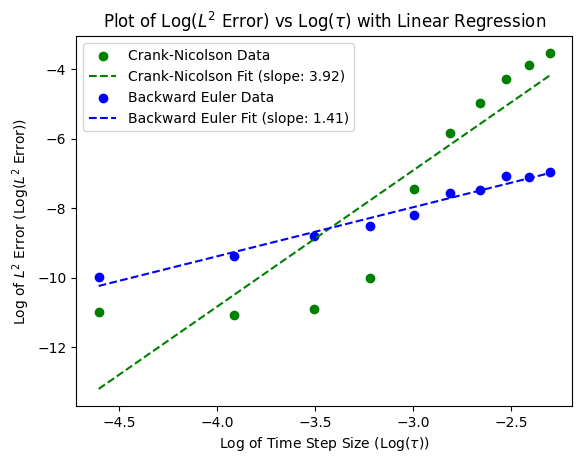

In [ ]:
# Combine the results from both methods into a single DataFrame
results_df_q2 = pd.concat([results_df_cn_q2_plot, results_df_backward_q2_plot])

# Ensure that 'tau' and 'L2 Error' are of numeric type
results_df_q2['tau'] = pd.to_numeric(results_df_q2['tau'])
results_df_q2['L2 Error'] = pd.to_numeric(results_df_q2['L2 Error'])

# Preparing the plot
fig, ax = plt.subplots()

colors = {'Backward Euler': 'blue', 'Crank-Nicolson': 'green'}

# Loop over each method to fit and plot
for method in results_df_q2['Method'].unique():
    subset = results_df_q2[results_df['Method'] == method]

    # Log-transforming x (tau) and y (L2 Error) for the regression
    x_log = np.log(subset['tau'])
    y_log = np.log(subset['L2 Error'])

    # Performing the linear least squares regression on the log-transformed values
    A = np.vstack([x_log, np.ones(len(x_log))]).T
    m, c = np.linalg.lstsq(A, y_log, rcond=None)[0]

    # Plotting original data points using their log values
    ax.scatter(x_log, y_log, color=colors[method], label=f'{method} Data')

    # Plotting the regression line using the log-transformed values
    x_vals = np.linspace(min(x_log), max(x_log), 100)  # Generating x values for the line
    y_vals = m * x_vals + c  # Calculating y values for the line
    ax.plot(x_vals, y_vals, color=colors[method], linestyle='--', label=f'{method} Fit (slope: {m:.2f})')

ax.set_xlabel('Log of Time Step Size (Log($\\tau$))')
ax.set_ylabel('Log of $L^2$ Error (Log($L^2$ Error))')
ax.set_title('Plot of Log($L^2$ Error) vs Log($\\tau$) with Linear Regression')
ax.legend()

plt.show()

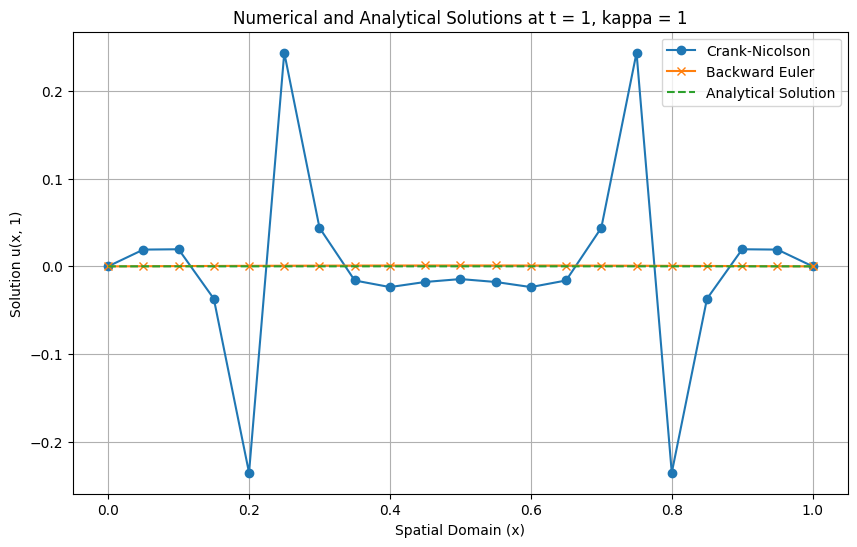

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def u0(x):
    return np.where((x >= 0.25) & (x <= 0.75), 1, 0)

# Specific values for plotting
h = 0.05
tau = 0.1
T = 1  # Total time
L = 1  # Length of the domain

# Generate spatial domain
x = np.linspace(0, L, int(L / h) + 1)

# Calculate numerical solutions
_, _, u_crank_nicolson = crank_nicolson_q2(u0, L, T, h, tau, kappa = 1)
_, _, u_backward_euler = backward_euler_q2(u0, L, T, h, tau, kappa = 1)

# Calculate analytical solution
u_analytical = analytical_solution_q2(x, T, kappa = 1, N=1000)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, u_crank_nicolson[:, -1], label='Crank-Nicolson', marker='o')
plt.plot(x, u_backward_euler[:, -1], label='Backward Euler', marker='x')
plt.plot(x, u_analytical, label='Analytical Solution', linestyle='--')

plt.title('Numerical and Analytical Solutions at t = 1, kappa = 1')
plt.xlabel('Spatial Domain (x)')
plt.ylabel('Solution u(x, 1)')
plt.legend()
plt.grid(True)
plt.show()


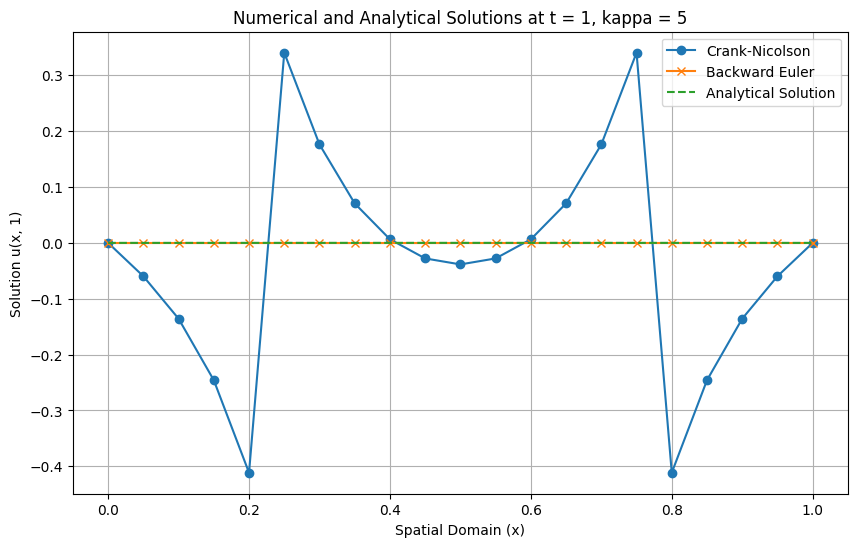

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def u0(x):
    return np.where((x >= 0.25) & (x <= 0.75), 1, 0)

# Specific values for plotting
h = 0.05
tau = 0.1
T = 1  # Total time
L = 1  # Length of the domain

# Generate spatial domain
x = np.linspace(0, L, int(L / h) + 1)

# Calculate numerical solutions
_, _, u_crank_nicolson = crank_nicolson_q2(u0, L, T, h, tau, kappa = 5)
_, _, u_backward_euler = backward_euler_q2(u0, L, T, h, tau, kappa = 5)

# Calculate analytical solution
u_analytical = analytical_solution_q2(x, T, kappa = 1, N=1000)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, u_crank_nicolson[:, -1], label='Crank-Nicolson', marker='o')
plt.plot(x, u_backward_euler[:, -1], label='Backward Euler', marker='x')
plt.plot(x, u_analytical, label='Analytical Solution', linestyle='--')

plt.title('Numerical and Analytical Solutions at t = 1, kappa = 5')
plt.xlabel('Spatial Domain (x)')
plt.ylabel('Solution u(x, 1)')
plt.legend()
plt.grid(True)
plt.show()

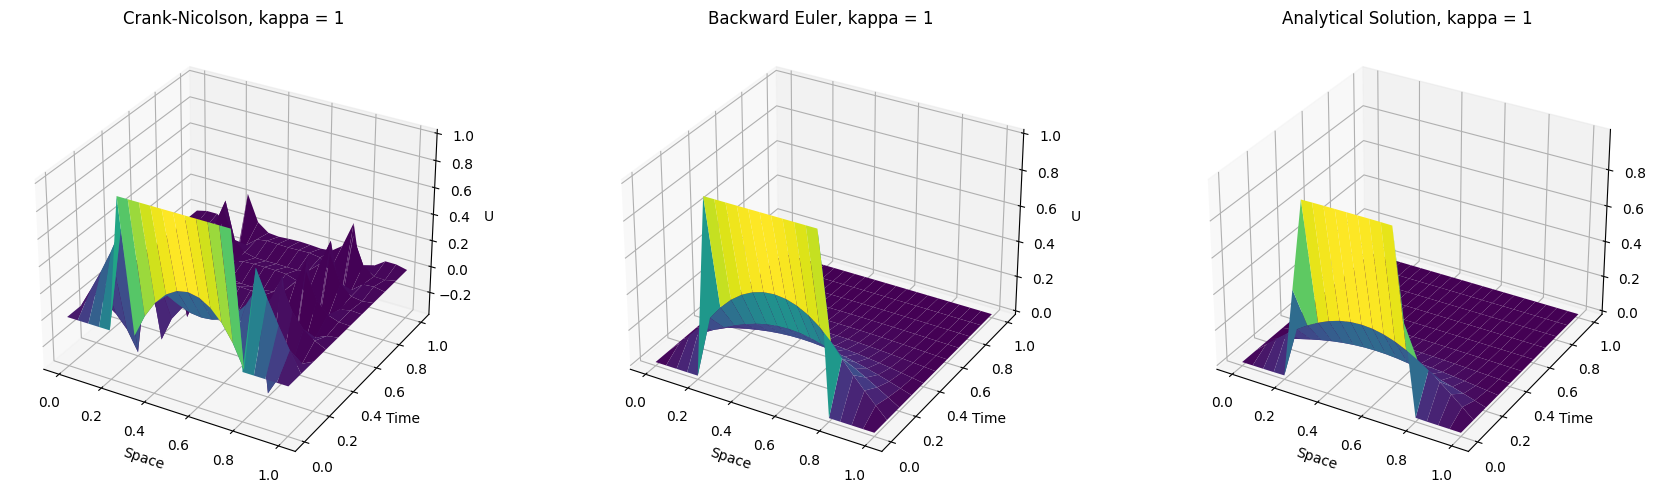

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def u0(x):
    return np.where((x >= 0.25) & (x <= 0.75), 1, 0)

# Parameters
L = 1
T = 1
h = 0.05
tau = 0.1
x = np.linspace(0, L, int(L / h) + 1)
t = np.linspace(0, T, int(T / tau) + 1)

# Assuming the crank_nicolson, backward_euler, and analytical_solution functions are defined

# Compute solutions
_, _, u_crank_nicolson = crank_nicolson_q2(u0, L, T, h, tau, kappa = 1)
_, _, u_backward_euler = backward_euler_q2(u0, L, T, h, tau, kappa = 1)
u_analytical = np.zeros_like(u_crank_nicolson)
for i, ti in enumerate(t):
    u_analytical[:, i] = analytical_solution_q2(x, ti, kappa = 1, N=1000)

# Surface plots
X, T = np.meshgrid(x, t)

fig = plt.figure(figsize=(18, 5))

# Crank-Nicolson
ax = fig.add_subplot(131, projection='3d')
ax.plot_surface(X, T, u_crank_nicolson.T, cmap='viridis')
ax.set_title('Crank-Nicolson, kappa = 1')
ax.set_xlabel('Space')
ax.set_ylabel('Time')
ax.set_zlabel('U')

# Backward Euler
ax = fig.add_subplot(132, projection='3d')
ax.plot_surface(X, T, u_backward_euler.T, cmap='viridis')
ax.set_title('Backward Euler, kappa = 1')
ax.set_xlabel('Space')
ax.set_ylabel('Time')
ax.set_zlabel('U')

# Analytical Solution
ax = fig.add_subplot(133, projection='3d')
ax.plot_surface(X, T, u_analytical.T, cmap='viridis')
ax.set_title('Analytical Solution, kappa = 1')
ax.set_xlabel('Space')
ax.set_ylabel('Time')
ax.set_zlabel('U')

plt.tight_layout()
plt.show()


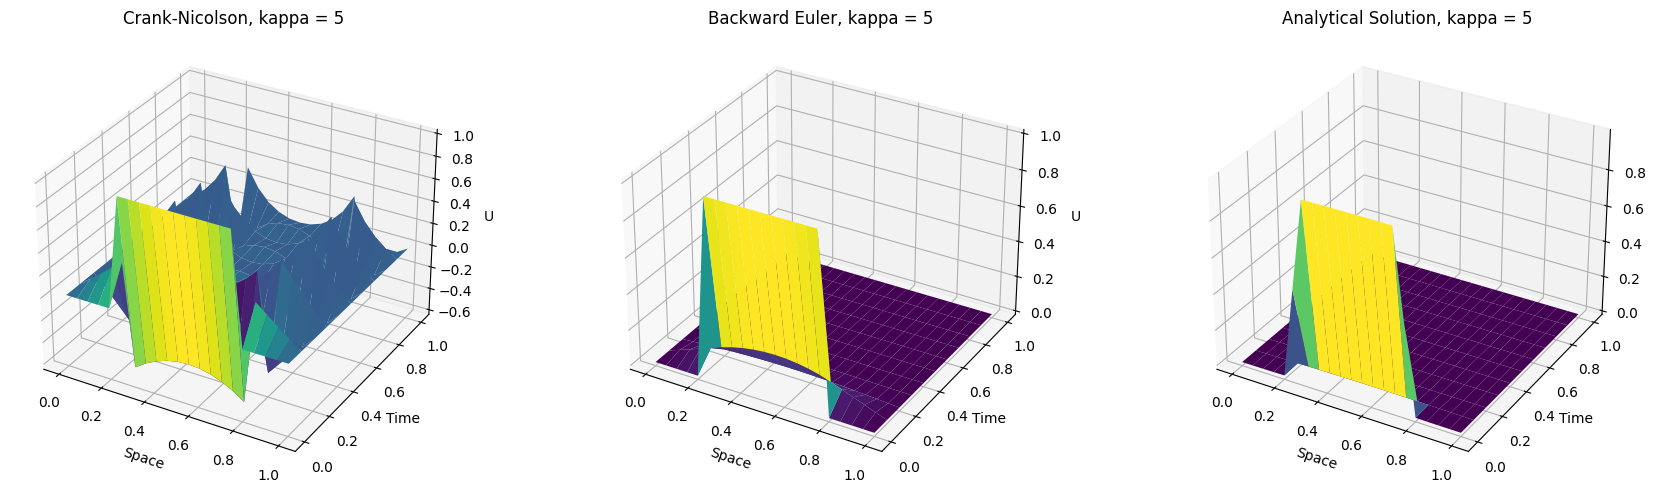

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def u0(x):
    return np.where((x >= 0.25) & (x <= 0.75), 1, 0)

# Parameters
L = 1
T = 1
h = 0.05
tau = 0.1
x = np.linspace(0, L, int(L / h) + 1)
t = np.linspace(0, T, int(T / tau) + 1)

# Assuming the crank_nicolson, backward_euler, and analytical_solution functions are defined

# Compute solutions
_, _, u_crank_nicolson = crank_nicolson_q2(u0, L, T, h, tau, kappa = 5)
_, _, u_backward_euler = backward_euler_q2(u0, L, T, h, tau, kappa = 5)
u_analytical = np.zeros_like(u_crank_nicolson)
for i, ti in enumerate(t):
    u_analytical[:, i] = analytical_solution_q2(x, ti, kappa = 5, N=1000)

# Surface plots
X, T = np.meshgrid(x, t)

fig = plt.figure(figsize=(18, 5))

# Crank-Nicolson
ax = fig.add_subplot(131, projection='3d')
ax.plot_surface(X, T, u_crank_nicolson.T, cmap='viridis')
ax.set_title('Crank-Nicolson, kappa = 5')
ax.set_xlabel('Space')
ax.set_ylabel('Time')
ax.set_zlabel('U')

# Backward Euler
ax = fig.add_subplot(132, projection='3d')
ax.plot_surface(X, T, u_backward_euler.T, cmap='viridis')
ax.set_title('Backward Euler, kappa = 5')
ax.set_xlabel('Space')
ax.set_ylabel('Time')
ax.set_zlabel('U')

# Analytical Solution
ax = fig.add_subplot(133, projection='3d')
ax.plot_surface(X, T, u_analytical.T, cmap='viridis')
ax.set_title('Analytical Solution, kappa = 5')
ax.set_xlabel('Space')
ax.set_ylabel('Time')
ax.set_zlabel('U')

plt.tight_layout()
plt.show()

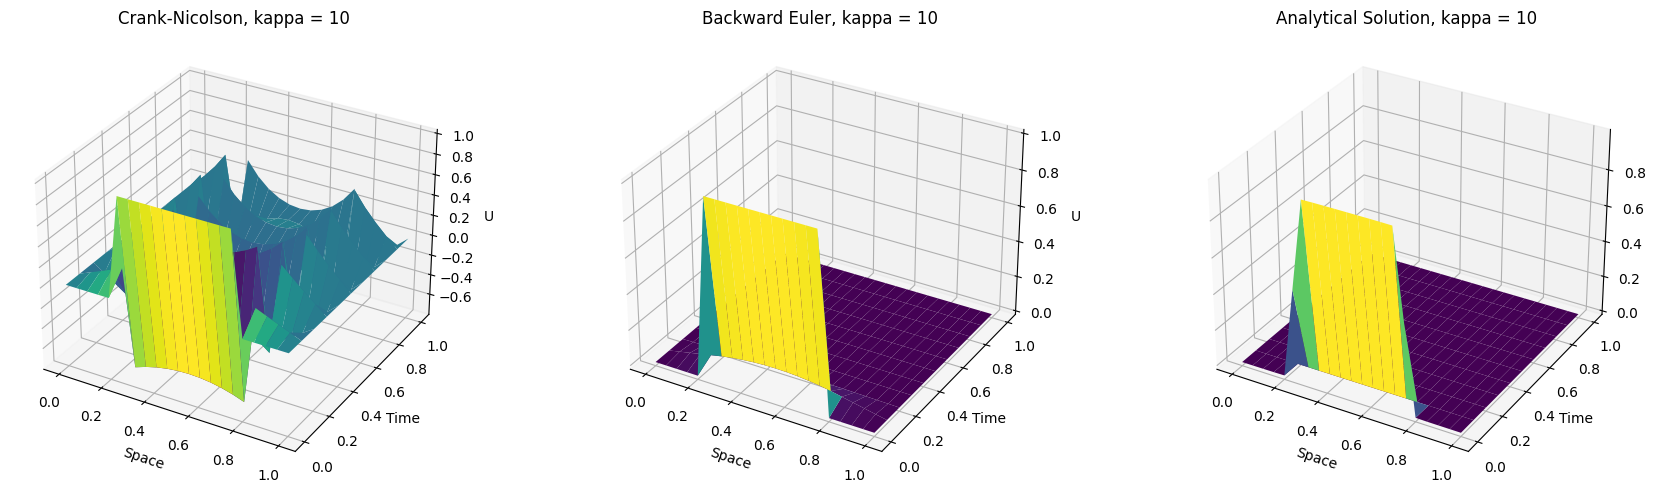

In [ ]:
def u0(x):
    return np.where((x >= 0.25) & (x <= 0.75), 1, 0)

# Parameters
L = 1
T = 1
h = 0.05
tau = 0.1
x = np.linspace(0, L, int(L / h) + 1)
t = np.linspace(0, T, int(T / tau) + 1)

# Assuming the crank_nicolson, backward_euler, and analytical_solution functions are defined

# Compute solutions
_, _, u_crank_nicolson = crank_nicolson_q2(u0, L, T, h, tau, kappa = 10)
_, _, u_backward_euler = backward_euler_q2(u0, L, T, h, tau, kappa = 10)
u_analytical = np.zeros_like(u_crank_nicolson)
for i, ti in enumerate(t):
    u_analytical[:, i] = analytical_solution_q2(x, ti, kappa = 10, N=1000)

# Surface plots
X, T = np.meshgrid(x, t)

fig = plt.figure(figsize=(18, 5))

# Crank-Nicolson
ax = fig.add_subplot(131, projection='3d')
ax.plot_surface(X, T, u_crank_nicolson.T, cmap='viridis')
ax.set_title('Crank-Nicolson, kappa = 10')
ax.set_xlabel('Space')
ax.set_ylabel('Time')
ax.set_zlabel('U')

# Backward Euler
ax = fig.add_subplot(132, projection='3d')
ax.plot_surface(X, T, u_backward_euler.T, cmap='viridis')
ax.set_title('Backward Euler, kappa = 10')
ax.set_xlabel('Space')
ax.set_ylabel('Time')
ax.set_zlabel('U')

# Analytical Solution
ax = fig.add_subplot(133, projection='3d')
ax.plot_surface(X, T, u_analytical.T, cmap='viridis')
ax.set_title('Analytical Solution, kappa = 10')
ax.set_xlabel('Space')
ax.set_ylabel('Time')
ax.set_zlabel('U')

plt.tight_layout()
plt.show()